## Capstone 2 - Abalone Age Prediction
### Modeling
**Context**:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope.

_Credit: https://www.kaggle.com/rodolfomendes/abalone-dataset_

**Goal**: The goal of this capstone project is to build a regression model that can predict the age of an abalone shell by accurately predicting its ring count.


**Modeling Objective**: Build two to three different models and identify the best one to predict the age of an abalone. 

In [131]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.dummy import DummyRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [132]:
#Import abalone dataset
abalone_data = pd.read_csv('/Users/joyopsvig/github/springboard/2-CapstoneAbalone/Notebooks/abaloneEDA_cleaned.csv')

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


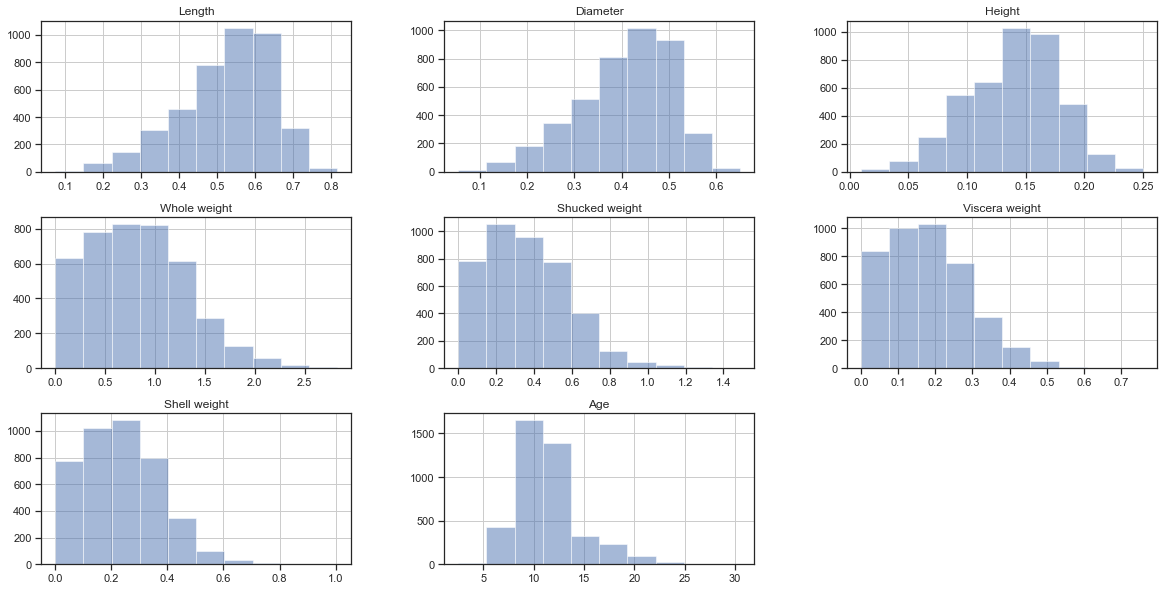

In [133]:
#Plot histograms to view distribution of data
abalone_data.hist(alpha=0.5, figsize=(20, 10))
plt.show()

In [134]:
#One hot encode the 'Sex' column since it is categorical
one_hot = pd.get_dummies(abalone_data['Sex'])

# Drop 'Sex' column as it is now encoded
abalone_data = abalone_data.drop('Sex',axis = 1)

# Join the encoded df
abalone_data = abalone_data.join(one_hot)

#Confirm Sex is one hot encoded
abalone_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


In [135]:
#Drop response variable
X = abalone_data.drop('Age', axis = 1)
y = abalone_data['Age']

## Multiple Linear Regression Model

_In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression. Wikipedia_

In [136]:
#Transform data so that it has a mean of 0 and std of 1
standardScale = StandardScaler()
standardScale.fit_transform(X)

#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#Create the linear regression model
regr = linear_model.LinearRegression()

#Fit the model to training data
regr.fit(X_train, y_train)

#Predict the test results
y_pred = regr.predict(X_test)

In [137]:
#View real values compared to predicted values
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df


,Real Values,Predicted Values
3191,21.5,15.276731
1803,11.5,10.891829
1720,11.5,13.388618
62,11.5,11.054080
1805,12.5,13.276927
...,...,...
1006,12.5,11.233012
4040,11.5,11.352859
2002,7.5,8.217463
3478,9.5,9.026864


In [138]:
#Create new table to understand where the biggest discrepencies in real and predicted values are
df['Difference'] = abs(df['Real Values'] - df['Predicted Values'])

#Sort new table by the highest absolute differences
df.sort_values(by=['Difference'], ascending=False, inplace=True)
df

,Real Values,Predicted Values,Difference
480,30.5,16.341446,14.158554
678,24.5,14.289557,10.210443
811,22.5,13.903416,8.596584
613,19.5,11.154808,8.345192
314,24.5,16.357284,8.142716
...,...,...,...
1230,8.5,8.491865,0.008135
3721,10.5,10.505959,0.005959
304,11.5,11.505505,0.005505
1048,12.5,12.496040,0.003960


<AxesSubplot:xlabel='Real Values', ylabel='Difference'>

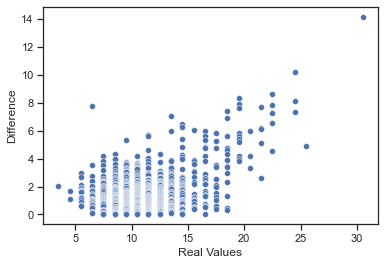

In [139]:
#Create scatterplot to understand which ages see the highest differences in prediction vs real values
import seaborn as sns
sns.set_theme(style='ticks')
sns.scatterplot(x='Real Values', y='Difference', data=df)

In [140]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[433, 530, 811, 3922, 3108, 3701, 1396, 1022]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
433,0.545,0.420,0.140,0.7505,0.2475,0.1300,0.2550,23.5,0,0,1
530,0.530,0.420,0.185,0.7520,0.2990,0.1560,0.2050,21.5,0,1,0
811,0.490,0.365,0.130,0.6835,0.1650,0.1315,0.2050,22.5,1,0,0
3922,0.500,0.400,0.165,0.7105,0.2700,0.1455,0.2250,21.5,1,0,0
3108,0.395,0.300,0.120,0.2995,0.1265,0.0680,0.0895,9.5,0,1,0
3701,0.670,0.510,0.155,1.2780,0.5605,0.3045,0.3580,12.5,1,0,0
1396,0.645,0.510,0.160,1.1835,0.5560,0.2385,0.3450,12.5,0,0,1
1022,0.640,0.500,0.170,1.5175,0.6930,0.3260,0.4090,12.5,1,0,0


**Finding** : My multiple regression model appears to work well on predicting the age of heaver (re: whole weight, shucked weight) abalones around 12.5 years in age, but performs poorly on abalones relatively older in age (age: 21.5+).

In [141]:
#Evaluate multiple regression model performance
regR2score =r2_score(y_test, y_pred)
MSEreg = mean_squared_error(y_test, y_pred)
RMSEreg = np.sqrt(mean_squared_error(y_test, y_pred))

print('R2 score:', regR2score)
print('MSE (mean squared error):', MSEreg)
print('RMSE (root mean squared error):', RMSEreg)

R2 score: 0.5307716286001649
MSE (mean squared error): 4.632206470930432
RMSE (root mean squared error): 2.1522561350662777


Reviewing the real values vs the predicted values, the multiple regression model performs OK. An R2 score of 52% suggests that only around half of the observed variation can be explained by the model's inputs. 

## Multiple Linear Regression Pt 2

Because my model performed best on abalones aged 12.5+ or younger, I am going to do a deeper dive to understand at which age threshold the performance weakens.

In [142]:
#Testing multiple regression on different age ranges of abalones
test_thresholds = [*range(7, 25, 1)]

rmse_scores = []
threshold = []

for test_threshold in test_thresholds:
    abalone_data_12 = abalone_data[abalone_data['Age'] <= test_threshold] 
    X = abalone_data_12.drop('Age', axis = 1)
    y = abalone_data_12['Age']

    #Transform data so that it has a mean of 0 and std of 1
    standardScale = StandardScaler()
    standardScale.fit_transform(X)

    #Split data into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    #Create the linear regression model
    regr = linear_model.LinearRegression()

    #Fit the model to training data
    regr.fit(X_train, y_train)

    #Predict the test results
    y_pred = regr.predict(X_test)

    #Evaluate multiple regression model performance
    regR2score =r2_score(y_test, y_pred)
    MSEreg = mean_squared_error(y_test, y_pred)
    RMSEreg = np.sqrt(mean_squared_error(y_test, y_pred))

    # print('Current test threshold:', test_threshold)
    # print('R2 score:', regR2score)
    # print('MSE (mean squared error):', MSEreg)
    # print('RMSE (root mean squared error):', RMSEreg)
    # print('-------------------------')
    rmse_scores.append(RMSEreg)
    threshold.append(test_threshold)

print(rmse_scores)
print(threshold)

[0.4596492817249226, 0.5894337646206698, 0.7414674447043416, 0.7759892363736541, 0.9033237117476933, 1.0048638598311477, 1.0915681892994054, 1.3026603722934595, 1.4129684362140522, 1.4365890566456727, 1.6163120758340357, 1.741002219585129, 1.8716822957800914, 1.8534625161085976, 1.966451231255275, 2.107064054857114, 1.988967080086535, 1.9092219384124667]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


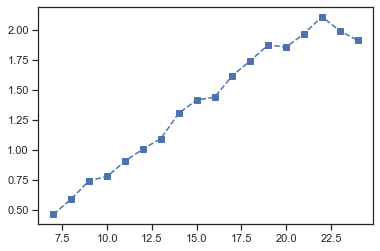

In [143]:
plt.plot(threshold, rmse_scores, 'bs--')

Above, you can see how the RMSE score of my model increases as I increase the age threshold of the abalone shells in my dataset.

## Ridge Regression Model

_Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where linearly independent variables are highly correlated. - Wikipedia_

_Ridge Regression is a popular type of regularized linear regression that includes an L2 penalty (penalize based on the sum of the squared coefficient values). This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task. - Machine Learning Mastery_

In [144]:
#Create the ridge regression model
ridge = Ridge(alpha=1.0)

#Fit the model on training data
ridge.fit(X_train, y_train)

#Predict the test results
y_pred_test_ridge = ridge.predict(X_test)

#View real values compared to predicted values
df2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test_ridge})
df2


,Real Values,Predicted Values
3068,10.5,12.370413
2558,8.5,9.426377
2038,7.5,7.595884
41,15.5,12.065057
3121,10.5,12.535852
...,...,...
93,11.5,13.687880
3718,8.5,9.407254
1026,9.5,12.606300
1601,10.5,11.503709


In [145]:
#Create new table to understand where the biggest discrepencies in real and predicted values are
df2['Difference'] = abs(df2['Real Values'] - df2['Predicted Values'])

#Sort new table by the highest absolute differences
df2.sort_values(by=['Difference'], ascending=False, inplace=True)
df2

,Real Values,Predicted Values,Difference
675,23.5,14.461028,9.038972
3922,21.5,12.528092,8.971908
310,22.5,14.540403,7.959597
33,20.5,12.834072,7.665928
570,17.5,9.836344,7.663656
...,...,...,...
396,11.5,11.515130,0.015130
1244,8.5,8.489258,0.010742
1170,10.5,10.506851,0.006851
66,13.5,13.493826,0.006174


In [146]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[530, 433, 811, 3922, 3485, 2450, 2020, 2354]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
530,0.530,0.420,0.185,0.7520,0.2990,0.1560,0.2050,21.5,0,1,0
433,0.545,0.420,0.140,0.7505,0.2475,0.1300,0.2550,23.5,0,0,1
811,0.490,0.365,0.130,0.6835,0.1650,0.1315,0.2050,22.5,1,0,0
3922,0.500,0.400,0.165,0.7105,0.2700,0.1455,0.2250,21.5,1,0,0
3485,0.510,0.405,0.130,0.5990,0.3065,0.1155,0.1485,9.5,0,1,0
2450,0.395,0.305,0.105,0.2820,0.0975,0.0650,0.0960,10.5,0,0,1
2020,0.525,0.410,0.130,0.6875,0.3435,0.1495,0.1765,10.5,0,0,1
2354,0.575,0.470,0.150,1.1415,0.4515,0.2040,0.4000,14.5,0,0,1


**Finding** : My ridge regression model appears to work well on predicting the age of younger abalones (age range: 9.5-14.5), but it performs poorly on older (age: 21.5+) abalones.

In [147]:
#Evaluate ridge regression model performance
rrR2score =r2_score(y_test, y_pred_test_ridge)
MSErr = mean_squared_error(y_test, y_pred_test_ridge)
RMSErr = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))

print('R2 score:', rrR2score)
print('MSE (mean squared error):', MSErr)
print('RMSE (root mean squared error):', RMSErr)

R2 score: 0.5620895238913053
MSE (mean squared error): 3.689628967978177
RMSE (root mean squared error): 1.9208406930243271


## Random Forest Model

_Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For regression tasks, the mean or average prediction of the individual trees is returned. Wikipedia_

In [148]:
#Create the random forest model and fit it to training data
randomforest = RandomForestRegressor()

#Fit the model on training data
randomforest.fit(X_train, y_train)

#Predict the test results
y_pred_test_rf = randomforest.predict(X_test)

#View real values compared to predicted values
df3 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test_rf})
df3


,Real Values,Predicted Values
3068,10.5,11.64
2558,8.5,8.74
2038,7.5,6.80
41,15.5,12.22
3121,10.5,12.18
...,...,...
93,11.5,13.74
3718,8.5,10.29
1026,9.5,13.24
1601,10.5,13.11


In [149]:
#Create new table to understand where the biggest discrepencies in real and predicted values are
df3['Difference'] = abs(df3['Real Values'] - df3['Predicted Values'])

#Sort new table by the highest absolute differences
df3.sort_values(by=['Difference'], ascending=False, inplace=True)
df3

,Real Values,Predicted Values,Difference
2268,19.5,11.39,8.11
33,20.5,12.41,8.09
310,22.5,14.56,7.94
3922,21.5,13.86,7.64
3812,7.5,14.74,7.24
...,...,...,...
2643,9.5,9.49,0.01
2426,11.5,11.49,0.01
4049,11.5,11.49,0.01
3107,8.5,8.50,0.00


In [150]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[433, 3180, 530, 485, 1206, 3485, 1875, 2847]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
433,0.545,0.420,0.140,0.7505,0.2475,0.1300,0.2550,23.5,0,0,1
3180,0.645,0.505,0.165,1.3070,0.4335,0.2620,0.5200,11.5,0,0,1
530,0.530,0.420,0.185,0.7520,0.2990,0.1560,0.2050,21.5,0,1,0
485,0.585,0.465,0.140,0.9080,0.3810,0.1615,0.3150,14.5,1,0,0
1206,0.750,0.570,0.210,2.2360,1.1090,0.5195,0.5450,12.5,1,0,0
3485,0.510,0.405,0.130,0.5990,0.3065,0.1155,0.1485,9.5,0,1,0
1875,0.540,0.395,0.135,0.6555,0.2705,0.1550,0.1920,10.5,0,1,0
2847,0.630,0.490,0.165,1.2005,0.5750,0.2730,0.2940,11.5,0,0,1


**Finding** : Viewing the above shells ranked by worst predicted to best predicted, it's hard to say why the model performs better on some and worse on others, although the worse predicted shells tend to be slightly higher in age on average.

In [151]:
#Evaluate random forest model performance
rfR2score =r2_score(y_test, y_pred_test_rf)
MSErf = mean_squared_error(y_test, y_pred_test_rf)
RMSErf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

print('R2 score:', rfR2score)
print('MSE (mean squared error):', MSErf)
print('RMSE (root mean squared error):', RMSErf)

R2 score: 0.5425600720548628
MSE (mean squared error): 3.854175
RMSE (root mean squared error): 1.9632052872789438


## Gradient Boost Model

_Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest. Wikipedia_

In [152]:
#Create the gb model
gb = SVR()

#Fit the model on training data
gb.fit(X_train, y_train)

#Predict the test results
y_pred_test_gb = svr.predict(X_test)

#View real values compared to predicted values
df4 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test_gb})
df4

NameError: name 'svr' is not defined

In [ ]:
#Create new table to understand where the biggest discrepencies in real and predicted values are
df4['Difference'] = abs(df4['Real Values'] - df4['Predicted Values'])

#Sort new table by the highest absolute differences
df4.sort_values(by=['Difference'], ascending=False, inplace=True)
df4

,Real Values,Predicted Values,Difference
480,30.5,13.902448,16.597552
673,22.5,11.168177,11.331823
351,23.5,12.398253,11.101747
433,23.5,12.660933,10.839067
3147,25.5,15.650683,9.849317
...,...,...,...
2865,7.5,7.509339,0.009339
3459,12.5,12.508087,0.008087
1207,12.5,12.492169,0.007831
3748,9.5,9.496316,0.003684


In [ ]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[433, 530, 3147, 313, 68, 835, 16, 2652]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
433,0.545,0.42,0.140,0.7505,0.2475,0.1300,0.2550,23.5,0,0,1
530,0.530,0.42,0.185,0.7520,0.2990,0.1560,0.2050,21.5,0,1,0
3147,0.700,0.54,0.215,1.9780,0.6675,0.3125,0.7100,25.5,1,0,0
313,0.620,0.47,0.200,1.2255,0.3810,0.2700,0.4350,24.5,1,0,0
68,0.475,0.39,0.120,0.5305,0.2135,0.1155,0.1700,11.5,1,0,0
835,0.450,0.35,0.130,0.5470,0.2450,0.1405,0.1405,9.5,0,1,0
16,0.355,0.28,0.085,0.2905,0.0950,0.0395,0.1150,8.5,0,1,0
2652,0.545,0.43,0.140,0.8320,0.4355,0.1700,0.2010,10.5,1,0,0


**Finding** : Similar to my multiple regression model, the gradient boost models appears to work well on predicting the age of abalones around 9.5-11.5 years old, but performs poorly on abalones relatively older in age (age: 21.5+).

In [ ]:
#Evaluate gb model performance
gbR2score =r2_score(y_test, y_pred_test_gb)
MSEgb = mean_squared_error(y_test, y_pred_test_gb)
RMSEgb = np.sqrt(mean_squared_error(y_test, y_pred_test_gb))

print('R2 score:', gbR2score)
print('MSE (mean squared error):', MSEgb)
print('RMSE (root mean squared error):', RMSEgb)

R2 score: 0.5313600545138235
MSE (mean squared error): 4.694494932847274
RMSE (root mean squared error): 2.1666783178052236


## Support Vector Regression (SVR)

_Support Vector Regression is a supervised learning algorithm that is used to predict discrete values. Support Vector Regression uses the same principle as the SVMs. The basic idea behind SVR is to find the best fit line. In SVR, the best fit line is the hyperplane that has the maximum number of points. Towards Data Science_

In [ ]:
#Create the SVR model
svr = SVR()

#Fit the model on training data
svr.fit(X_train, y_train)

#Predict the test results
y_pred_test_svr = svr.predict(X_test)

#View real values compared to predicted values
df5 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test_svr})
df5


,Real Values,Predicted Values
1805,12.5,12.266535
1382,10.5,11.629017
275,23.5,14.682705
2245,10.5,11.389675
1985,5.5,5.931151
...,...,...
3312,12.5,9.271896
135,9.5,11.329265
2196,7.5,6.948983
1518,11.5,11.980814


In [ ]:
#Create new table to understand where the biggest discrepencies in real and predicted values are
df5['Difference'] = abs(df5['Real Values'] - df5['Predicted Values'])

#Sort new table by the highest absolute differences
df5.sort_values(by=['Difference'], ascending=False, inplace=True)
df5

,Real Values,Predicted Values,Difference
480,30.5,13.853718,16.646282
673,22.5,11.239378,11.260622
351,23.5,12.677979,10.822021
433,23.5,12.789521,10.710479
3147,25.5,15.678871,9.821129
...,...,...,...
2727,8.5,8.489993,0.010007
635,9.5,9.507747,0.007747
4146,12.5,12.494110,0.005890
1399,12.5,12.494925,0.005075


In [ ]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[433, 530, 3147, 313, 68, 835, 16, 2652]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
433,0.545,0.42,0.140,0.7505,0.2475,0.1300,0.2550,23.5,0,0,1
530,0.530,0.42,0.185,0.7520,0.2990,0.1560,0.2050,21.5,0,1,0
3147,0.700,0.54,0.215,1.9780,0.6675,0.3125,0.7100,25.5,1,0,0
313,0.620,0.47,0.200,1.2255,0.3810,0.2700,0.4350,24.5,1,0,0
68,0.475,0.39,0.120,0.5305,0.2135,0.1155,0.1700,11.5,1,0,0
835,0.450,0.35,0.130,0.5470,0.2450,0.1405,0.1405,9.5,0,1,0
16,0.355,0.28,0.085,0.2905,0.0950,0.0395,0.1150,8.5,0,1,0
2652,0.545,0.43,0.140,0.8320,0.4355,0.1700,0.2010,10.5,1,0,0


In [ ]:
#Evaluate SVR model performance
svrR2score =r2_score(y_test, y_pred_test_svr)
MSEsvr = mean_squared_error(y_test, y_pred_test_svr)
RMSEsvr = np.sqrt(mean_squared_error(y_test, y_pred_test_svr))

print('R2 score:', svrR2score)
print('MSE (mean squared error):', MSEsvr)
print('RMSE (root mean squared error):', RMSEsvr)

R2 score: 0.5330325783240016
MSE (mean squared error): 4.677740802885514
RMSE (root mean squared error): 2.162808545129576


## K Nearest Neighbors (KNN)

_KNN model is popularly used for non-linear regression in Machine Learning. KNN (K Nearest Neighbours) follows an easy implementation approach for non-linear regression in Machine Learning. KNN assumes that the new data point is similar to the existing data points. The new data point is compared to the existing categories and is placed under a relatable category. The average value of the k nearest neighbors is taken as the input in this algorithm. The neighbors in KNN models are given a particular weight that defines their contribution to the average value. Jigsaw Academy_

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 3.029389883315467
RMSE value for k=  2 is: 2.6157586827897634
RMSE value for k=  3 is: 2.4335791264793714
RMSE value for k=  4 is: 2.315885608018083
RMSE value for k=  5 is: 2.281132003718944
RMSE value for k=  6 is: 2.2726264055173955
RMSE value for k=  7 is: 2.2532675815276715
RMSE value for k=  8 is: 2.2365966786761384
RMSE value for k=  9 is: 2.2198369488896352
RMSE value for k=  10 is: 2.20115565258265
RMSE value for k=  11 is: 2.203595025781557
RMSE value for k=  12 is: 2.2039719939285267
RMSE value for k=  13 is: 2.213662980870561
RMSE value for k=  14 is: 2.213094697080042
RMSE value for k=  15 is: 2.21685366844854
RMSE value for k=  16 is: 2.2168689074083967
RMSE value for k=  17 is: 2.209354190683443
RMSE value for k=  18 is: 2.204446117041278
RMSE value for k=  19 is: 2.2036040415438976
RMSE value for k=  20 is: 2.2102734916851303


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[11,12,13,14,15,16,17,18]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 16}

In [ ]:
#Create the KNN model and fit it to training data
knn = KNeighborsRegressor(n_neighbors = 16)

#Fit the model on training data
knn.fit(X_train, y_train)

#Predict the test results
y_pred_test_knn = knn.predict(X_test)

#View real values compared to predicted values
df6 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test_knn})
df6

#Create new table to understand where the biggest discrepencies in real and predicted values are
df6['Difference'] = abs(df6['Real Values'] - df6['Predicted Values'])

#Sort new table by the highest absolute differences
df6.sort_values(by=['Difference'], ascending=False, inplace=True)
df6

,Real Values,Predicted Values,Difference
480,30.5,13.7500,16.7500
433,23.5,12.5000,11.0000
351,23.5,13.3125,10.1875
673,22.5,12.6250,9.8750
3147,25.5,15.8750,9.6250
...,...,...,...
2789,11.5,11.5000,0.0000
133,8.5,8.5000,0.0000
689,12.5,12.5000,0.0000
801,11.5,11.5000,0.0000


In [ ]:
#Find the abalones with the highest and lowest predicted vs real values from original dataset
abalone_data.loc[[530, 433, 3147, 483, 3753, 2875, 2643, 1246]]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age,F,I,M
530,0.530,0.420,0.185,0.7520,0.2990,0.1560,0.205,21.5,0,1,0
433,0.545,0.420,0.140,0.7505,0.2475,0.1300,0.255,23.5,0,0,1
3147,0.700,0.540,0.215,1.9780,0.6675,0.3125,0.710,25.5,1,0,0
483,0.580,0.460,0.150,0.9955,0.4290,0.2120,0.260,20.5,1,0,0
3753,0.510,0.395,0.105,0.5525,0.2340,0.1270,0.165,9.5,0,1,0
2875,0.460,0.360,0.140,0.4470,0.1610,0.0870,0.160,10.5,0,1,0
2643,0.490,0.380,0.110,0.5540,0.2935,0.1005,0.150,9.5,0,0,1
1246,0.390,0.300,0.095,0.3265,0.1665,0.0575,0.089,8.5,0,1,0


**Finding** : My KNN model also appears to inaccurately predict abalones with higher ages (20.5+).

In [ ]:
#Evaluate KNN model performance
KnnR2score =r2_score(y_test, y_pred_test_knn)
MSEKnn = mean_squared_error(y_test, y_pred_test_knn)
RMSEknn = np.sqrt(mean_squared_error(y_test, y_pred_test_knn))

print('R2 score:', KnnR2score)
print('MSE (mean squared error):', MSEKnn)
print('RMSE (root mean squared error):', RMSEknn)

R2 score: 0.5093967129092299
MSE (mean squared error): 4.9145077526340994
RMSE (root mean squared error): 2.2168689074083967


# Conclusion
##### Reviewing the above models, the multiple linear regression model performs best at accurately predicting the age of an abalone. 

In [ ]:
print('RMSE for each model')
print('Multiple Linear Regression ', RMSEreg)
print('Ridge Regression ', RMSErr)
print('Random Forest ', RMSErf)
print('Gradient Boost ', RMSEgb)
print('SVR ', RMSEsvr)
print('KNN ', RMSEknn)

RMSE for each model
Multiple Linear Regression  2.061486605015729
Ridge Regression  2.0886053130340145
Random Forest  2.100200455676312
Gradient Boost  2.1666783178052236
SVR  2.162808545129576
KNN  2.2168689074083967
